# Midterm
Kabilan Sriranjan
17/03/18

In [2]:
import math
import numpy as np
import scipy.special as scp
import matplotlib.pyplot as plt

# Part 1

Applying a $3^{rd}$ order Mean Value Theorem to $f(x)$ at the points $h$ and $-h$, expanding around $0$, yields


\begin{align*}
&\exists \; \phi \in (0,h), \psi \in (-h,0) \, s.t. \\
f(h) &= f(0) + hf^{\prime}(0) + \frac{1}{2}h^2f^{\prime\prime}(0) + \frac{1}{6}h^3f^{\prime\prime\prime}(\phi) \\
f(-h) &= f(0) - hf^{\prime}(0) + \frac{1}{2}h^2f^{\prime\prime}(0) - \frac{1}{6}h^3f^{\prime\prime\prime}(\psi)
\end{align*}

Rewriting $\tilde{D}_h$ using the above formulas for $f$ we get
\begin{align*}
\tilde{D}_h &= \frac{f(0) + hf^{\prime}(0) + \frac{1}{2}h^2f^{\prime\prime}(0) + \frac{1}{6}h^3f^{\prime\prime\prime}(\phi) + \delta f(h) - f(0) + hf^{\prime}(0) - \frac{1}{2}h^2f^{\prime\prime}(0) + \frac{1}{6}h^3f^{\prime\prime\prime}(\psi) - \delta f(-h)}{2h} \\
&= \frac{2hf^{\prime}(0) + \frac{1}{6}h^3f^{\prime\prime\prime}(\phi) + \frac{1}{6}h^3f^{\prime\prime\prime}(\psi)}{2h} + \frac{\delta f(h) - \delta f(-h)}{2h} \\
&=  f^{\prime}(0) + \frac{1}{12}h^2f^{\prime\prime\prime}(\phi) + \frac{1}{12}h^2f^{\prime\prime\prime}(\psi) + \frac{\delta f(h) - \delta f(-h)}{2h} \\
&= f^{\prime}(0) + \frac{1}{6}\Bigg(\frac{h^2f^{\prime\prime\prime}(\phi) + h^2f^{\prime\prime\prime}(\psi)}{2}\Bigg) + \frac{\delta f(h) - \delta f(-h)}{2h} \\
\end{align*}

We know the function $h^2f^{\prime\prime\prime}(x)$ is continuous and that $\frac{h^2f^{\prime\prime\prime}(\phi) + h^2f^{\prime\prime\prime}(\psi)}{2}$ is between $h^2f^{\prime\prime\prime}(\phi)$ and $h^2f^{\prime\prime\prime}(\psi)$ so we can apply the Intermediate Value Theorem. Hence we have

\begin{align*}
&\exists \; \xi \in (\phi, \psi) \, s.t. \\
f^{\prime\prime\prime}(\xi) &= \frac{h^2f^{\prime\prime\prime}(\phi) + h^2f^{\prime\prime\prime}(\psi)}{2} \\
\end{align*}

We can now use this in the equation of $\tilde{D}_h$ to get
\begin{align*}
\tilde{D}_h &= f^{\prime}(0) + \frac{1}{6}f^{\prime\prime\prime}(\xi) + \frac{\delta f(h) - \delta f(-h)}{2h} \\
\tilde{D}_h - f^{\prime}(0) &= \frac{1}{6}f^{\prime\prime\prime}(\xi) + \frac{\delta f(h) - \delta f(-h)}{2h}
\end{align*}

Defining $M$ as in the questions it is obvious that $\max \{f^{\prime\prime\prime}(x) | x \in [-a,a]\} \leq M$. It is also easy to see that $|\delta f(h) - \delta f(-h)| \leq 2\epsilon$ from
\begin{align*}
-\epsilon \leq \delta f(h) &\leq \epsilon \\
-\epsilon \leq \delta f(-h) &\leq \epsilon \\
-2\epsilon \leq \delta f(h) - \delta f(-h) &\leq 2\epsilon \\
|\delta f(h) - \delta f(-h)| &\leq 2\epsilon
\end{align*}

So we have the bound
\begin{align*}
|\tilde{D}_h - f^{\prime}(0)| \leq \frac{\epsilon}{h} + \frac{Mh^2}{6}
\end{align*}

Now considering this bound as a function $B(h)$ we wish to find its minimum. The derivative can be found easily.
\begin{align*}
B(h) &=  \frac{Mh^2}{6} + \frac{\epsilon}{h} \\
B^{\prime}(h) &= \frac{Mh}{3} - \frac{\epsilon}{h^2}
\end{align*}

Setting the derivative to $0$ and solving for $h$
\begin{align*}
\frac{Mh}{3} - \frac{\epsilon}{h^2} &= 0 \\
\frac{Mh}{3} = \frac{\epsilon}{h^2} \\
h^3 = \frac{3\epsilon}{M} \\
h = \bigg(\frac{3\epsilon}{M}\bigg)^{1/3}
\end{align*}

As we can see there is an optimal choice of $h$ to minimize the approximation error. Contrary to what one might think without any further inspection, setting $h$ to be arbitrarily small does not improve the error bound. This is because the fact that we perturbed $f$ by $\delta f$ introduces a factor of $h$ in the denominator. Making $h$ go to $0$ causes the error term to blow up.

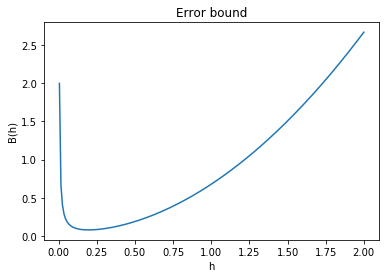

In [3]:
eps = 0.01
M = 4
h = np.linspace(eps/2,M/2, 200)
Bh = M*h**2/6 + eps/h
plt.plot(h,Bh)
plt.title("Error bound")
plt.xlabel("h")
plt.ylabel("B(h)")
plt.show()

The plot of $B(h)$ shows that we want to choose $h$ to be small, but making it too small will cause a sharp increase in error.

# Part 2

To investigate Runge's phenomenon I used the logit function but with the denominator squared.

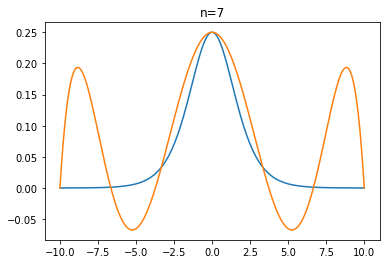

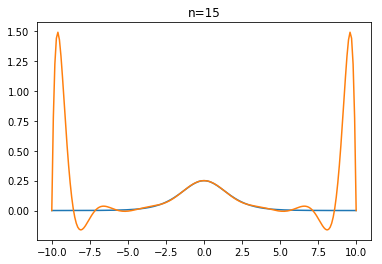

In [4]:
def f(x):
    return np.exp(x)/(1+np.exp(x))**2

#Take a function f, a list of nodes, and a set of values and evaluates the Lagrange polynomial at each value
def LInterp(f, nodes, x):
    V = np.vander(nodes)
    alpha = np.linalg.solve(V, f(nodes))
    L = np.vander(x)[:,-alpha.size:]
    return L.dot(alpha)

minimum = -10
maximum = 10
n = 7
m=15
nodes = np.linspace(minimum,maximum,n)
nodes2 = np.linspace(minimum, maximum, m)
   
x = np.linspace(minimum,maximum,200)
y = f(x)
yn2 = LInterp(f, nodes, x)
ym2 = LInterp(f, nodes2, x)
plt.plot(x,y)
plt.plot(x,yn2)
plt.title("n=7")
plt.show()
plt.plot(x,y)
plt.plot(x, ym2)
plt.title("n=15")
plt.show()

The wide oscillations near the boundary are due to Runge's phenomenon.

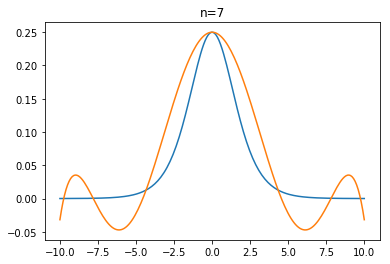

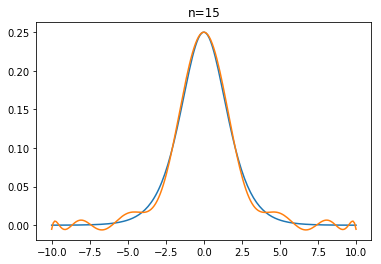

In [5]:
#Take a minimum, maximum, and an n and returns the Chebyshev nodes in increasing order
def chebyNodes(minimum, maximum, n):
    k = np.array(range(1,n+1))
    return ((minimum+maximum)/2 + np.cos((2*k-1)*(np.pi)/(2*n))*(maximum-minimum)/2)[::-1]

yn3 = LInterp(f, chebyNodes(minimum, maximum, n), x)
ym3 = LInterp(f, chebyNodes(minimum, maximum, m), x)
plt.plot(x,y)
plt.plot(x,yn3)
plt.title("n=7")
plt.show()
plt.plot(x, y)
plt.plot(x, ym3)
plt.title("n=15")
plt.show()

By using Chebyshev's nodes instead of evenly places ones our interpolation is much better.

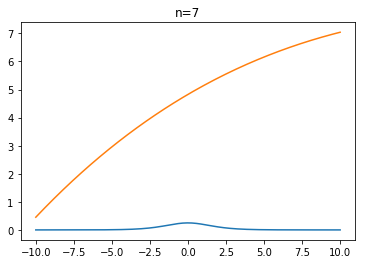

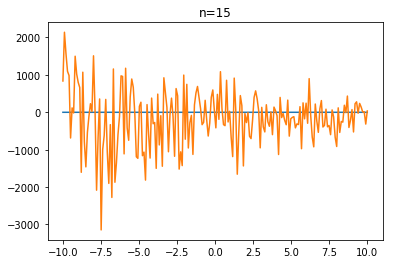

In [7]:
#Take values n, k, and x and compute the (n,j) Bernstein polynomial at x
def bernBasis(n, k, x):
    return scp.binom(n,k)*(x**k)*(1-x)**(n-k)

#Take a function f, a degree n, and a value x to evaluate the Bernstein polynomial at x
def bernPoly(f, n, x):
    b = 0
    for k in range(0, n+1):
        b = b + f(k/n)*bernBasis(n, k, x)
    return b

yn4 = bernPoly(f, n, x)
ym4 = bernPoly(f, m, x)
plt.plot(x,y)
plt.plot(x,yn4)
plt.title("n=7")
plt.show()
plt.plot(x,y)
plt.plot(x, ym4)
plt.title("n=15")
plt.show()

By approximating with Bernstein polynomials we have found a near perfect approximation in the middle of the interval that varies widely at the edges.

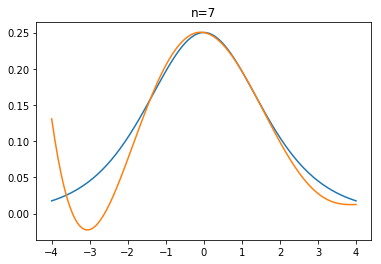

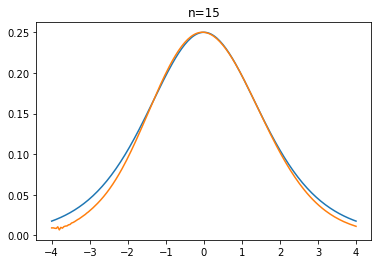

In [22]:
newX = np.linspace(-4, 4, 200)
newY = f(newX)
yn5 = bernPoly(f, n, newX)
ym5 = bernPoly(f, m, newX)
plt.plot(newX, newY)
plt.plot(newX, yn5)
plt.title("n=7")
plt.show()
plt.plot(newX, newY)
plt.plot(newX, ym5)
plt.title("n=15")
plt.show()

Here we have a zoomed in plot of the Bernstein polynomial approximation to see how it behaves. The approximation is even closer than with Chebyshev nodes when looking at the the center of the interval.